In [451]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import datetime


In [452]:
%store -r df_clean

In [453]:
df_clean.head(3)

,DATE,YEAR,TYPE,COUNTRY,AREA,LOCATION,ACTIVITY,INJURY,FATAL (Y/N),SPECIES,MONTH,ACTIVITY_TYPE,SPECIES
0,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",paddling,"No injury to occupant, outrigger canoe and pad...",N,White shark,Jun,paddling,white shark
1,8-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",standing,Minor injury to left thigh,N,NaN,Jun,standing,unknown
2,9-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",surfing,Injury to left lower leg from surfboard skeg,N,NaN,Jun,Surfing,unknown


<AxesSubplot:xlabel='YEAR', ylabel='Count'>

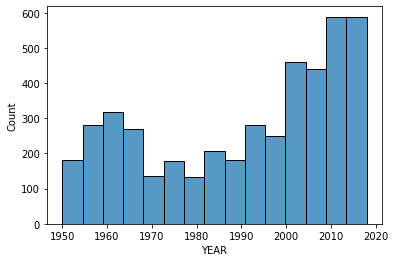

In [454]:
sns.histplot(df_clean["YEAR"])


In [455]:
df_clean.YEAR.describe()

count    4497.000000
mean     1990.709139
std        20.851468
min      1950.000000
25%      1971.000000
50%      1997.000000
75%      2009.000000
max      2018.000000
Name: YEAR, dtype: float64

<AxesSubplot:xlabel='COUNTRY', ylabel='Count'>

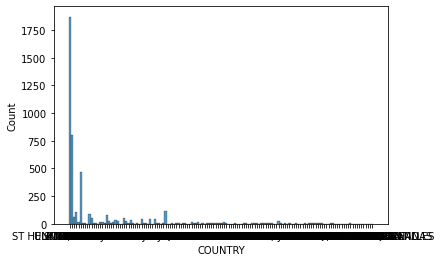

In [456]:
sns.histplot(df_clean["COUNTRY"])

The data in some countries is not comparable with others. Then I'm going to analyse those countries with higher number of attacks.

In [457]:
df_clean["COUNTRY"].count()

4497

In [458]:
df_clean.COUNTRY.value_counts().head(10)

USA                 1870
AUSTRALIA            800
SOUTH AFRICA         469
PAPUA NEW GUINEA     115
BRAZIL               103
BAHAMAS               93
NEW ZEALAND           81
MEXICO                63
REUNION               56
NEW CALEDONIA         48
Name: COUNTRY, dtype: int64

Text(0.5, 1.0, 'USA')

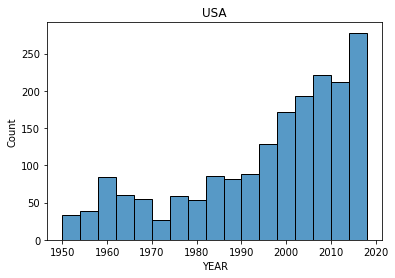

In [459]:
sns.histplot(df_clean[df_clean["COUNTRY"] == "USA"]["YEAR"]).set_title('USA')


Text(0.5, 1.0, 'Australia')

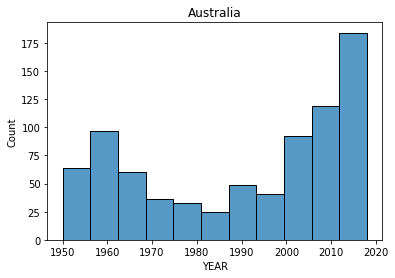

In [460]:
sns.histplot(df_clean[df_clean["COUNTRY"] == "AUSTRALIA"]["YEAR"]).set_title('Australia')

Text(0.5, 1.0, 'South Africa')

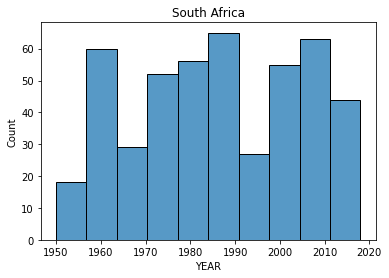

In [461]:
sns.histplot(df_clean[df_clean["COUNTRY"] == "SOUTH AFRICA"]["YEAR"]).set_title('South Africa')

Text(0.5, 1.0, 'Brazil')

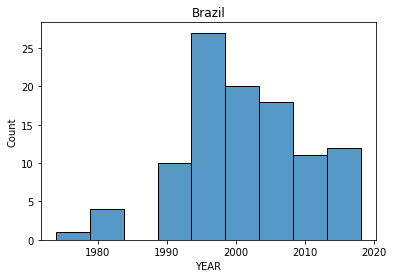

In [462]:
sns.histplot(df_clean[df_clean["COUNTRY"] == "BRAZIL"]["YEAR"]).set_title('Brazil')

Text(0.5, 1.0, 'Spain')

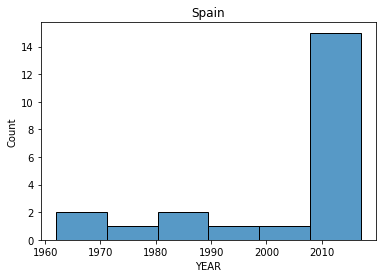

In [463]:
sns.histplot(df_clean[df_clean["COUNTRY"] == "SPAIN"]["YEAR"]).set_title('Spain')

After a light brows, I will focus my analysys on Australia and USA as they are the most significant countries in regards to this topic.

#                                              AUSTRALIA vs USA 

Text(0.5, 1.0, 'USA')

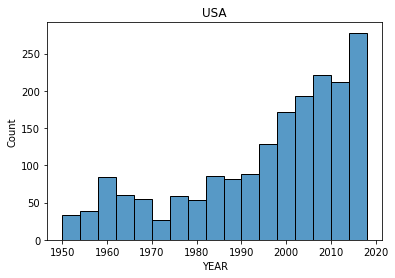

In [464]:
sns.histplot(df_clean[df_clean["COUNTRY"] == "USA"]["YEAR"]).set_title('USA')

Text(0.5, 1.0, 'USA attacks per months')

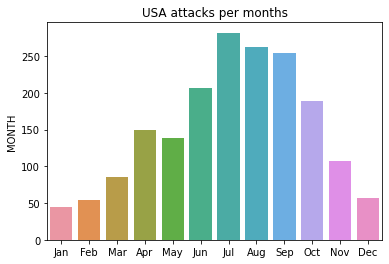

In [465]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
sns.barplot(x=df_clean[df_clean["COUNTRY"] == "USA"]['MONTH'].value_counts().loc
            [lambda x : x>10].index,y=df_clean[df_clean["COUNTRY"] == "USA"]
            ['MONTH'].value_counts().loc[lambda x : x>10],order=months)
plt.title("USA attacks per months")

Text(0.5, 1.0, 'Australia')

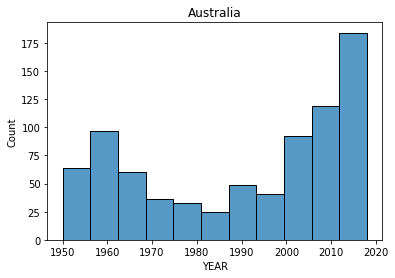

In [466]:
sns.histplot(df_clean[df_clean["COUNTRY"] == "AUSTRALIA"]["YEAR"]).set_title('Australia')


Text(0.5, 1.0, 'Australia attacks per months')

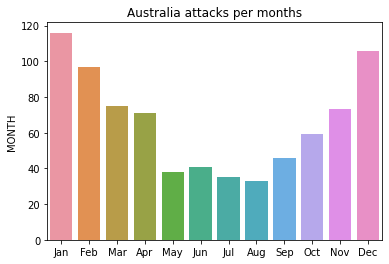

In [467]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
sns.barplot(x=df_clean[df_clean["COUNTRY"] == "AUSTRALIA"]['MONTH'].value_counts().loc
            [lambda x : x>10].index,y=df_clean[df_clean["COUNTRY"] == "AUSTRALIA"]
            ['MONTH'].value_counts().loc[lambda x : x>10],order=months)

plt.title("Australia attacks per months")

Text(0.5, 1.0, 'Type of attack Australia')

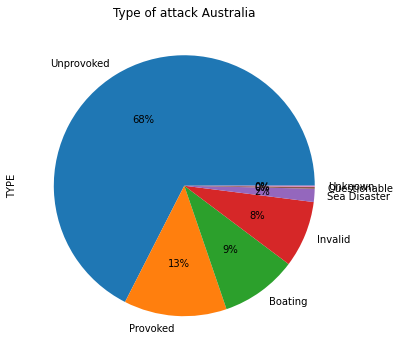

In [474]:
(df_clean[df_clean["COUNTRY"] == "AUSTRALIA"]
 ["TYPE"]).value_counts().plot(kind='pie',autopct='%1.0f%%',figsize=(6, 6)).set_title('Type of attack Australia')

Text(0.5, 1.0, 'Fatal Australia')

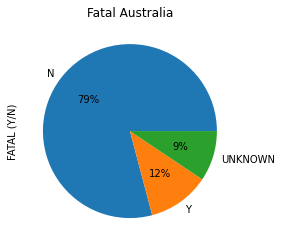

In [478]:
(df_clean[df_clean["COUNTRY"] == "AUSTRALIA"]
 ["FATAL (Y/N)"]).value_counts().plot(kind='pie',autopct='%1.0f%%',figsize=(4, 4)).set_title('Fatal Australia')

Text(0.5, 1.0, 'Type of attack USA')

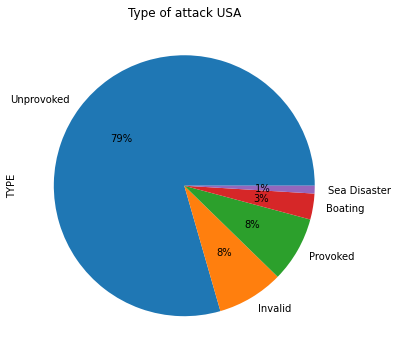

In [475]:
(df_clean[df_clean["COUNTRY"] == "USA"]
 ["TYPE"]).value_counts().plot(kind='pie',autopct='%1.0f%%',figsize=(6, 6)).set_title('Type of attack USA')

Text(0.5, 1.0, 'Fatal USA')

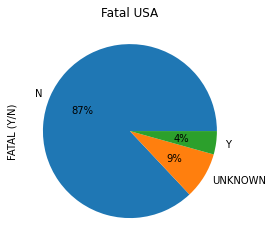

In [476]:
(df_clean[df_clean["COUNTRY"] == "USA"]
 ["FATAL (Y/N)"]).value_counts().plot(kind='pie',autopct='%1.0f%%',figsize=(4, 4)).set_title('Fatal USA')

With this data I can analyse but I'm not able to make an hypothesis. 

If we compare the data of USA with Australia we can say that the number of attacks increase during summer time. 

This is only because is when more people dives, snorkel or boat, so this is not a big discovery. 

Regarding the years data we can also say that there are more and more shark attacks from 90's until now. This could be also because more and more water sports are practiced, like scuba diving or surfing.


Regarding the type of attack vs if the victim is finally death or not I could conclude by saying that in Australia there is a 12% of the attacks which end with the death of the victim and the 13% is considered provoked, which means that the person who were attacked was "disturbing" (following or hunting) the shark. While in USA the percentage of deaths is lower (4%) and the provoked attack lower (8%) as well, so probably if there is a correlation: 

"If you disturb the shark you can die"

At last seeing that there are more shark attacks and less fatal cases in USA than Australia. We can also say that the sharks in Australia are more dangerous than those in USA.
